## Goal of this exemple
RBF regression is a simple method to fit a function to a set of data.
The goal of this exemple is to show how to use the RBF regression in the `rbfregression` package.
the python package [rbf-regression](https://gitlab.com/emileroux83/rbf-regression) is available on [gitlab](https://gitlab.com/emileroux83/rbf-regression).

To show how to use, we will use a synthetique data set.
The data set is generated from a function with some noise. 
The goal is to fit a RBG regression model based on the data set.


## The synthetique data to fit
The data aer generated from a "simple" function with some noise. 

### The function is:

$$
f(x) = \exp\left(-\left(\frac{x-50}{20}\right)^2\right)/2 + \frac{1}{150} \cdot x
$$

The noise is a normal distribution with a standard deviation of $\sigma^2$ is added to the function.

The impementation of the function is:


In [1]:
import numpy as np
def function(x, s2 =.1):
    y = np.exp(-((x-50)/20.)**2)/2 + 1/150.*x
    y += s2 * np.random.randn(len(x))
    return y

### plot the data
Two set of points are created :
- the training set with noise
- the test set without noise that will be used to evaluate the ground function

In [2]:
# Noisy data for learning
X_l = np.arange(0, 150, 1.)
Y_l = function(X_l)
X_l = np.atleast_2d(X_l).T

# No noise function values
X_true = np.arange(0, 150, 1.)
Y_true = function(X_true, s2=0)


This tow sets are ploted in the figure below :

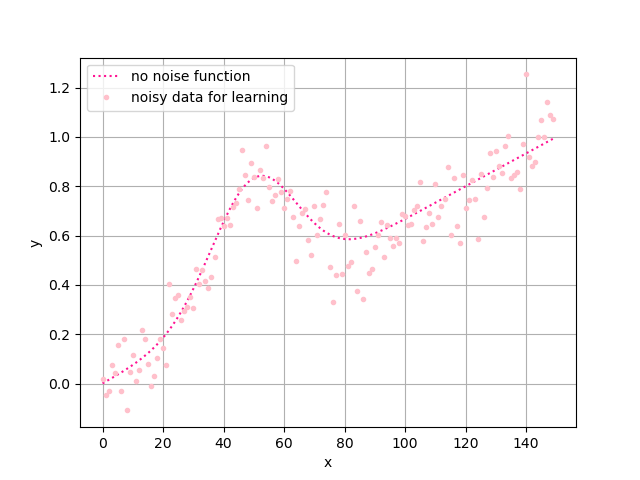

In [3]:
import matplotlib.pyplot as plt
%matplotlib ipympl
colors = ['pink', 'lightpink', 'hotpink', 'deeppink']
plt.figure()
plt.plot(X_true, Y_true, ':', color = colors[3],  label ='no noise function')
plt.plot(X_l, Y_l, '.',color = colors[0], label ='noisy data for learning')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


## RBF kernel definition
the equation of the radial basis function kernel is given by:
$$
k(x_i, x_j) = \exp\left(-\frac{d^2}{2 r^2}\right)
$$
where $r$ is the kernel bandwidth, and $d$ is the euclidian distance between the two points $x_i$ and $x_j$.


In [4]:
def Gauss_kernel(d, radius):
    radius *= 0.707
    result = np.exp(-(d **2 ) / (2.0 * radius**2)) 
    return result


The RBF kernel can be plotted for different values of $r$:


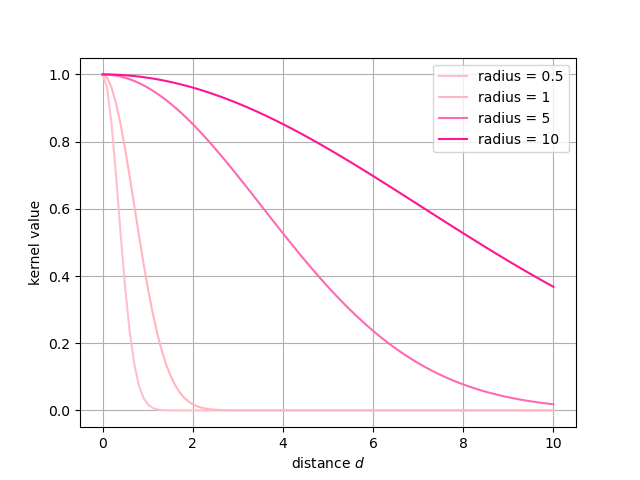

In [5]:
plt.figure()
d = np.linspace(0, 10, 100)
colors = ['pink', 'lightpink', 'hotpink', 'deeppink']
for radius, color in zip([0.5, 1, 5, 10], colors):
    plt.plot(d, Gauss_kernel(d, radius), label='radius = {}'.format(radius), color=color)
plt.xlabel('distance $d$')
plt.ylabel('kernel value')
plt.grid()
plt.legend()
plt.show()


## Fit the RBF regression
Once the RBF kernel is defined, the RBF regression can be fitted to the data set.

A set of $N$ key points is defined.
This key point can be seen as control points.
It means that the RBF regression model will be constructed using $N$ RBF kernels centered on the $N$ key points.


In [6]:
# Key points
X_k = np.linspace(10, 141, 8) 
X_k = np.atleast_2d(X_k).T


Wa have defined :
- the learninf data set
- the RBF kernel
- the key points

Now we can fit the RBF regression model to the data set using the `RBFRegression` class.

In [9]:
# import of the rbfregression module
import rbfregression.core as rbfreg
# Create the RegularizedRBF instance
RBF = rbfreg.RegularizedRBF(kernel=Gauss_kernel)

# Set the control points (key points)
RBF.set_key_points(X_k)

# Compute the fit
RBF.fit(X_l, Y_l, regularization=0.0, radius = 30)


Once the model is fitted, we can evaluate the model  and plot the resulting fit :

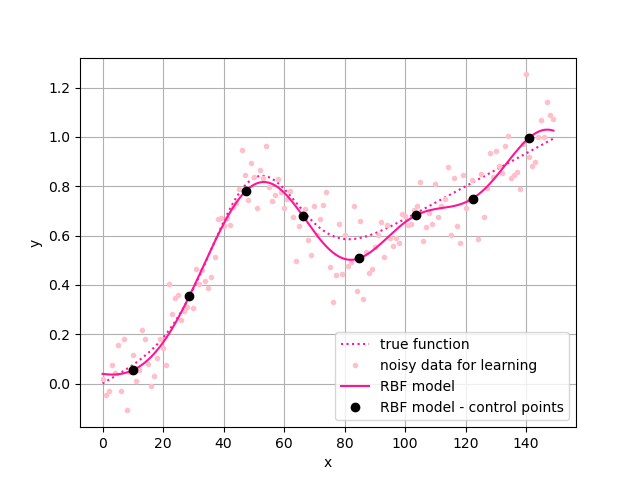

In [10]:

# Eval the model at points
Y_s = RBF.eval(X_l)
Y_k = RBF.eval(X_k)

# Plot them all
plt.figure()
plt.plot(X_true, Y_true, ':',color = colors[3], label ='true function')
plt.plot(X_l, Y_l, '.',color = colors[0], label ='noisy data for learning')
plt.plot(X_l, Y_s, '-',color = colors[3], label ='RBF model')
plt.plot(X_k, Y_k, 'ok', label ='RBF model - control points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Conclusion
This exemple shows how to fit the RBF regression model to a data set.
The $r$ parameter of the BRF kernel is set by the user here, but it can be optimized using a cross validation method, or a the likelihood maximization method.

The RBF kernel used here is gaussien, but other kernels can be used as TPS (thin plate spline), or other.

The TPS kernel is defined by:
$$
k(x_i, x_j) = \frac{(d/r)^2}{2} \log(d/r)
$$
where $d$ is the euclidian distance between the two points $x_i$ and $x_j$, and $r$ is the kernel bandwidth.
